<a href="https://colab.research.google.com/github/LeratoMatlala1/Predictive-Analytics/blob/main/PA_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification Models**

Import Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from datetime import datetime

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score)
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB

# Display all columns
pd.set_option('display.max_column', None)

from sklearn import set_config
set_config(transform_output='pandas')
pd.set_option('display.max_row', 100)

## **Data Load**

In [ ]:
# Import the data
fpath = '/content/drive/MyDrive/Masters/loan.data.csv'
df = pd.read_csv(fpath)

#Set the first row as headers
#df.columns = df.iloc[0]
#df = df.drop(0)
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,643538,48349,65210,76.68,3,16092,51,51,20-12-1981,Salaried,30-10-2018,1,2297,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,595627,55159,62972,88.93,72,16682,45,475,01-01-1976,Self employed,21-10-2018,11,1134,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
2,586518,67882,113530,61.66,7,23091,51,5858,26-03-1992,Self employed,18-10-2018,3,3152,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,491581,55613,69807,85.95,103,20285,86,6995,01-01-1997,Self employed,05-09-2018,7,72,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,1
4,614684,46249,67645,70.22,67,18129,45,1511,22-02-1980,Salaried,24-10-2018,6,252,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


## **Initial Inspection**

### *Dataframe Shape*

In [ ]:
#Get the number of rows and columns
df.shape

(133154, 41)

The data has 133 154 rows and 41 features

### *Data Types*


In [ ]:
#check data types
df.dtypes

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

###*Dataframe Statistics Summary*

In [ ]:
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT
count,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.0,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,133154.000000,1.331540e+05,1.331540e+05,1.331540e+05,133154.000000,133154.000000,133154.000000,1.331540e+05,1.331540e+05,1.331540e+05,1.331540e+05,1.331540e+05,133154.000000,133154.000000,133154.000000,133154.000000
mean,535964.574493,54389.069566,75916.481773,74.738936,72.842108,19643.586591,69.019977,3399.629617,7.266526,1551.526143,1.0,0.839622,0.075349,0.145343,0.023244,0.002283,290.040795,2.443404,1.045091,0.156435,1.671216e+05,2.232095e+05,2.224093e+05,0.059518,0.028568,0.007660,6.004683e+03,7.877112e+03,7.766295e+03,1.306096e+04,3.376126e+02,0.383075,0.098660,0.207609,0.329513
std,68358.660334,12735.478594,18554.526848,11.455518,69.809436,3487.616196,22.149555,2236.753597,4.481254,974.705673,0.0,0.366958,0.263954,0.352448,0.150677,0.047727,338.653056,5.186279,1.972267,0.543756,9.327441e+05,2.967196e+06,2.967257e+06,0.628394,0.326211,0.114844,1.942231e+05,1.987130e+05,1.982223e+05,1.554926e+05,1.753046e+04,0.959062,0.389464,0.704704,0.470038
min,417428.000000,13640.000000,37000.000000,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.018309e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476695.250000,47145.000000,65745.000000,68.870000,14.000000,16556.000000,48.000000,1512.000000,4.000000,716.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535988.500000,53803.000000,71000.000000,76.780000,61.000000,20333.000000,86.000000,2971.000000,6.000000,1451.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595188.750000,60447.000000,79279.750000,83.660000,130.000000,23000.000000,86.000000,5678.000000,10.000000,2365.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,3.000000,1.000000,0.000000,3.536825e+04,6.300000e+04,6.100000e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03,0.000000e+00,0.000000,0.000000,0.000000,1.000000
max,658676.000000,592460.000000,715186.000000,95.000000,261.000000,24793.000000,153.000000,7345.000000,22.000000,3791.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,453.000000,144.000000,23.000000,9.652492e+07,1.000000e+09,1.000000e+09,52.000000,36.000000,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,23.000000,1.000000


### *Null Values*

In [ ]:
#Identify missing values
df.isna().sum()

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        4381
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

There are 4381 null values in Employment Type, which could mean that the people are unemployed, or the employment type is unknown. These nulls will need to be addressed in the pre-processing step.

### *Duplicates*

In [ ]:
#Check if there are there duplicates
df.duplicated().sum()

0

There are no duplicates in the data

###*Data Categories*

In [ ]:
#Determining categorical columns from the data
CatColumns = df.select_dtypes(object).columns
CatColumns

Index(['DATE_OF_BIRTH', 'EMPLOYMENT_TYPE', 'DISBURSAL_DATE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH'],
      dtype='object')

In [ ]:
#Determining the unique values in the categorical columns
df[CatColumns].nunique()

DATE_OF_BIRTH                    14468
EMPLOYMENT_TYPE                      2
DISBURSAL_DATE                      84
PERFORM_CNS_SCORE_DESCRIPTION       20
AVERAGE_ACCT_AGE                   173
CREDIT_HISTORY_LENGTH              262
dtype: int64

In [ ]:
CatColumns = df.select_dtypes(object).columns
for i in CatColumns:
    print(f'Value counts for {i}')
    print(df[i].value_counts())
    print('\n')

Value counts for DATE_OF_BIRTH
01-01-1988    1283
01-01-1990    1253
01-01-1987    1238
01-01-1985    1180
01-01-1991    1161
              ... 
08-08-1966       1
17-06-1969       1
26-11-1961       1
30-11-1960       1
15-08-1957       1
Name: DATE_OF_BIRTH, Length: 14468, dtype: int64


Value counts for EMPLOYMENT_TYPE
Self employed    72787
Salaried         55986
Name: EMPLOYMENT_TYPE, dtype: int64


Value counts for DISBURSAL_DATE
31-10-2018    5045
31-08-2018    3825
24-10-2018    3807
23-10-2018    3660
26-10-2018    3544
22-10-2018    3378
25-10-2018    3378
30-10-2018    3349
30-08-2018    2646
29-10-2018    2574
27-10-2018    2482
29-08-2018    2282
20-09-2018    2240
14-09-2018    2209
28-09-2018    2146
21-10-2018    2143
28-08-2018    2132
29-09-2018    2121
30-09-2018    2050
19-09-2018    2045
20-10-2018    1970
13-10-2018    1917
21-09-2018    1914
25-09-2018    1882
17-08-2018    1852
27-09-2018    1809
16-08-2018    1806
22-08-2018    1786
26-09-2018    1782
15-10-201

- Because of the unique number of values in DATE_OF_BIRTH, the column will instead be used to calculate the age of the customer.
- EMPLOYMENT_TYPE wil be encoded with one hot encoder
- DISBURSAL_DATE will be used to calculate duration since disbursment.
- PERFORM_CNS_SCORE_DESCRIPTION is an ordinal feature, therefore, I will assign integer labels to the ordinal categories based on their order.
- AVERAGE_ACCT_AGE will be converted to a value in months
- CREDIT_HISTORY_LENGTH will also be converted into a value in months

## **Pre-Processing**

###*Change Categoricat Features to Numeric*

In [ ]:
#Convert AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH to a duration value in months

def duration(dur):
    yrs = int(dur.split(' ')[0].replace('yrs',''))
    mon = int(dur.split(' ')[1].replace('mon',''))
    return yrs*12+mon

df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(duration)
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].apply(duration)
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,643538,48349,65210,76.68,3,16092,51,51,20-12-1981,Salaried,30-10-2018,1,2297,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,595627,55159,62972,88.93,72,16682,45,475,01-01-1976,Self employed,21-10-2018,11,1134,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,586518,67882,113530,61.66,7,23091,51,5858,26-03-1992,Self employed,18-10-2018,3,3152,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,491581,55613,69807,85.95,103,20285,86,6995,01-01-1997,Self employed,05-09-2018,7,72,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,614684,46249,67645,70.22,67,18129,45,1511,22-02-1980,Salaried,24-10-2018,6,252,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def age(dob):
    yr = int(dob[-2:])
    if yr >=0 and yr < 20:
        return yr + 2000
    else:
         return yr + 1900

df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].apply(age)
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].apply(age)
#df_age['Age']=df_age['DisbursalDate']-df_age['Date_of_Birth']

In [ ]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,643538,48349,65210,76.68,3,16092,51,51,1981,Salaried,2018,1,2297,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,595627,55159,62972,88.93,72,16682,45,475,1976,Self employed,2018,11,1134,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,586518,67882,113530,61.66,7,23091,51,5858,1992,Self employed,2018,3,3152,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,491581,55613,69807,85.95,103,20285,86,6995,1997,Self employed,2018,7,72,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,614684,46249,67645,70.22,67,18129,45,1511,1980,Salaried,2018,6,252,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
def calculate_age(birth_year):
    # Get the current year
    current_year = datetime.now().year

    # Calculate the age
    age = current_year - birth_year

    return age

df['DATE_OF_BIRTH'] = df['DATE_OF_BIRTH'].apply(calculate_age)
df['DISBURSAL_DATE'] = df['DISBURSAL_DATE'].apply(calculate_age)
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,643538,48349,65210,76.68,3,16092,51,51,42,Salaried,5,1,2297,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,595627,55159,62972,88.93,72,16682,45,475,47,Self employed,5,11,1134,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,586518,67882,113530,61.66,7,23091,51,5858,31,Self employed,5,3,3152,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,491581,55613,69807,85.95,103,20285,86,6995,26,Self employed,5,7,72,1,1,1,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,614684,46249,67645,70.22,67,18129,45,1511,43,Salaried,5,6,252,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts()

No Bureau History Available                                66695
C-Very Low Risk                                             9077
A-Very Low Risk                                             8174
D-Very Low Risk                                             6496
B-Very Low Risk                                             5318
M-Very High Risk                                            5043
F-Low Risk                                                  4862
K-High Risk                                                 4659
H-Medium Risk                                               3959
E-Low Risk                                                  3280
I-Medium Risk                                               3171
G-Low Risk                                                  2290
Not Scored: Sufficient History Not Available                2188
J-High Risk                                                 2147
Not Scored: Not Enough Info available on the customer       2082
Not Scored: No Activity s

In [ ]:
#converting categorical features into numerical features
df['PERFORM_CNS_SCORE_DESCRIPTION'] = df['PERFORM_CNS_SCORE_DESCRIPTION'].replace({'No Bureau History Available': 0,'Not Scored: Not Enough Info available on the customer':0,'Not Scored: No Activity seen on the customer (Inactive)':0, 'Not Scored: Sufficient History Not Available':0,'Not Scored: No Updates available in last 36 months': 0,'Not Scored: Only a Guarantor': 0,'Not Scored: More than 50 active Accounts found': 0,'M-Very High Risk': 5,'L-Very High Risk': 5,'K-High Risk': 4,'J-High Risk':4,'I-Medium Risk':3,'H-Medium Risk':3,'G-Low Risk': 2,'F-Low Risk':2,'E-Low Risk': 2,'D-Very Low Risk':1,'C-Very Low Risk': 1, 'B-Very Low Risk':1,'A-Very Low Risk':1 })

In [ ]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,643538,48349,65210,76.68,3,16092,51,51,42,Salaried,5,1,2297,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,595627,55159,62972,88.93,72,16682,45,475,47,Self employed,5,11,1134,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,586518,67882,113530,61.66,7,23091,51,5858,31,Self employed,5,3,3152,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,491581,55613,69807,85.95,103,20285,86,6995,26,Self employed,5,7,72,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,614684,46249,67645,70.22,67,18129,45,1511,43,Salaried,5,6,252,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###*Check Class Balance*

In [ ]:
# Check how many samples of each class are present
df['LOAN_DEFAULT'].value_counts(normalize=True)

0    0.670487
1    0.329513
Name: LOAN_DEFAULT, dtype: float64

The classes good enough to be considered balanced, therefore we can continue with pre-processing

###*Split the Data*

In [ ]:
# Defining X and y variables
X = df.drop(columns = ['LOAN_DEFAULT']).copy()
y = df['LOAN_DEFAULT']

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# check class balances in y_train values
y_train.value_counts(normalize=True)

0    0.670485
1    0.329515
Name: LOAN_DEFAULT, dtype: float64

###*Prepare the data for modeling*

In [ ]:
#Create lists of column names for numeric, nominal and ordinal features
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Select categorical columns (excluding 'PERFORM_CNS_SCORE_DESCRIPTION' which is ordinal)
categorical_columns = ['EMPLOYMENT_TYPE']

# Select ordinal column 'PERFORM_CNS_SCORE_DESCRIPTION'
ordinal_column = df['PERFORM_CNS_SCORE_DESCRIPTION']

###*Transform Categorical Columns*

In [ ]:
categorical_columns

['EMPLOYMENT_TYPE']

*Fill Null Values and One-Hot Encode*

In [ ]:
# We will use a 'constant' strategy and the fill_value 'unknown'
# Transformers
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Pipeline
Cat_pipeline = make_pipeline(imputer, ohe_encoder)
#Define Categorical Tuple for ColumnTransformer
cat_tuple = ('Categorical', Cat_pipeline, categorical_columns)
cat_tuple

('Categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='Unknown', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 ['EMPLOYMENT_TYPE'])

In [ ]:
#Use the tuples to create a ColumnTransformer to preprocess the data. Make sure to set verbose_feature_names_out to False!
col_transformer = ColumnTransformer([cat_tuple], verbose_feature_names_out=False)
#Fit the ColumnTransformer on your training data.
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Unknown',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['EMPLOYMENT_TYPE'])],
                  verbose_feature_names_out=False)

In [ ]:
#Transform the training and test data and save them as new variables
X_train_tf= col_transformer.transform(X_train)
X_test_tf= col_transformer.transform(X_test)
X_train_tf

,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,EMPLOYMENT_TYPE_Unknown
76030,1.0,0.0,0.0
95634,0.0,1.0,0.0
53349,1.0,0.0,0.0
110652,0.0,1.0,0.0
24351,1.0,0.0,0.0
...,...,...,...
80172,0.0,1.0,0.0
59606,1.0,0.0,0.0
56609,0.0,1.0,0.0
3472,0.0,1.0,0.0


Drop old EMPLOYMENT_TYPE, and combine X data with transformed columns

In [ ]:
X_train = X_train.drop(columns='EMPLOYMENT_TYPE')
X_test = X_test.drop(columns='EMPLOYMENT_TYPE')

In [ ]:
X_train_final = pd.concat([X_train, X_train_tf, ], axis=1)
X_test_final = pd.concat([X_test, X_test_tf, ], axis=1)
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99865 entries, 76030 to 14224
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UNIQUEID                             99865 non-null  int64  
 1   DISBURSED_AMOUNT                     99865 non-null  int64  
 2   ASSET_COST                           99865 non-null  int64  
 3   LTV                                  99865 non-null  float64
 4   BRANCH_ID                            99865 non-null  int64  
 5   SUPPLIER_ID                          99865 non-null  int64  
 6   MANUFACTURER_ID                      99865 non-null  int64  
 7   CURRENT_PINCODE_ID                   99865 non-null  int64  
 8   DATE_OF_BIRTH                        99865 non-null  int64  
 9   DISBURSAL_DATE                       99865 non-null  int64  
 10  STATE_ID                             99865 non-null  int64  
 11  EMPLOYEE_CODE_ID        

### Scale Data

In [ ]:
scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train_final) # normalizing the features
#X_test_scaled = scaler.fit_transform(X_test_final)

#X_train_scaled.info()

## Modelling

### **Logistic Regression**

In [ ]:
# Create and fit a default logistic regression model
model = LogisticRegression(max_iter=20000)


# Pipeline
lr_pipe = make_pipeline(scaler, model)

lr_pipe.fit(X_train_final,y_train)

# Make predictions on the train and test set
y_pred_test = lr_pipe.predict(X_test_final)
y_pred_train = lr_pipe.predict(X_train_final)

In [ ]:
# Generate a classification report
labels = ['Default','No Default']
print('Train Report')
print(classification_report(y_train, y_pred_train, target_names=labels))

print('Test Report')
print(classification_report(y_test, y_pred_test, target_names=labels))


Train Report
              precision    recall  f1-score   support

     Default       0.84      0.86      0.85     66958
  No Default       0.69      0.66      0.68     32907

    accuracy                           0.79     99865
   macro avg       0.77      0.76      0.76     99865
weighted avg       0.79      0.79      0.79     99865

Test Report
              precision    recall  f1-score   support

     Default       0.83      0.86      0.85     22320
  No Default       0.69      0.65      0.67     10969

    accuracy                           0.79     33289
   macro avg       0.76      0.76      0.76     33289
weighted avg       0.79      0.79      0.79     33289



In [ ]:
# Evaluate the model using accuracy
LR_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Accuracy of Logistic Regression: {LR_accuracy:.2f}")

Accuracy of Logistic Regression: 0.79


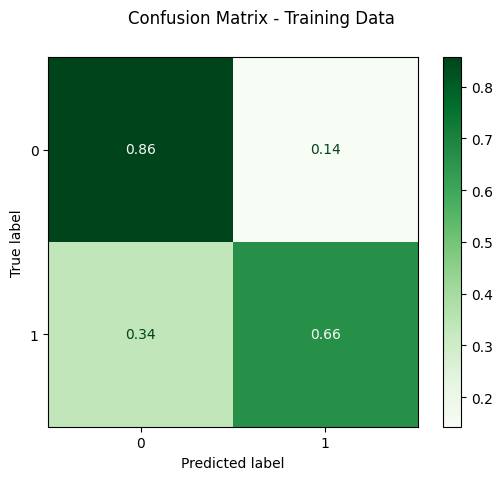

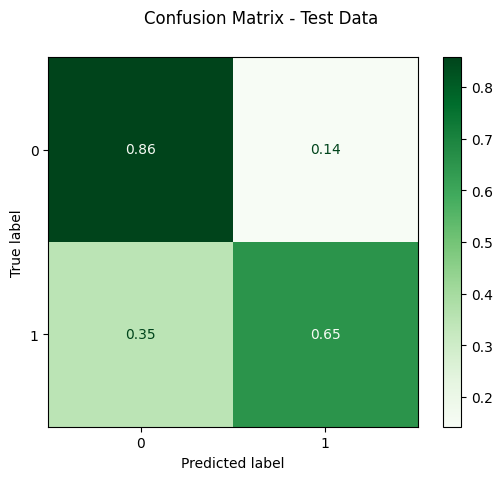

In [ ]:
# Create confusion matrices for training and test data
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train,
               normalize='true',  cmap='Greens')
plt.suptitle('Confusion Matrix - Training Data');

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test,
               normalize='true',  cmap='Greens')
plt.suptitle('Confusion Matrix - Test Data');

In [ ]:
# Add a constant term to the feature matrix (intercept)
X_model = sm.add_constant(X_train_final)

# Fit the logistic regression model
model = sm.Logit(y_train, X_model)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.446316
         Iterations 8


In [ ]:
# Get the summary of the logistic regression model
summary = result.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           LOAN_DEFAULT   No. Observations:                99865
Model:                          Logit   Df Residuals:                    99825
Method:                           MLE   Df Model:                           39
Date:                Thu, 14 Sep 2023   Pseudo R-squ.:                  0.2958
Time:                        21:30:45   Log-Likelihood:                -44571.
converged:                       True   LL-Null:                       -63298.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
UNIQUEID                             7.302e-07   1.25e-07      5.843      0.000    4.85e-07    9.75e-07
DISBURSED_AMOUNT                    -3.272e-05    3.6e-06     -9.090      0.000   -3.98e-05   -2.57e-05
ASSET_COST                            2.88e-05   2.39e-06     12.045      0.000    2.41e-05    3.35e-05
LTV                                     0.0737      0.003     25.532      0.000       0.068       0.079
BRANCH_ID                               0.0002      0.000      1.866      0.062   -1.15e-05       0.000
SUPPLIER_ID                          7.341e-06   2.53e-06      2.897      0.004    2.37e-06    1.23e-05
MANUFACTURER_ID                        -0.0003      0.000     -0.747      0.455      -0.001       0.000
CURRENT_PINCODE_ID                   1.403e-05   4.32e-06      3.249      0.001    5.56e-06    2.25e-05
DATE_OF_BIRTH                          -0.0018      0.001     -2.004      0.045      -0.004   -4.02e-05
DISBURSAL_DATE                         -1.3061   4.65e+04  -2.81e-05      1.000   -9.12e+04    9.12e+04
STATE_ID                                0.0067      0.002      3.430      0.001       0.003       0.010
EMPLOYEE_CODE_ID                     8.779e-06   8.65e-06      1.015      0.310   -8.18e-06    2.57e-05
MOBILENO_AVL_FLAG                      -0.2612   1.02e+05  -2.57e-06      1.000      -2e+05       2e+05
AADHAR_FLAG                            -0.0413      0.067     -0.619      0.536      -0.172       0.090
PAN_FLAG                               -0.0713      0.033     -2.146      0.032      -0.137      -0.006
VOTERID_FLAG                            0.0286      0.065      0.438      0.661      -0.099       0.157
DRIVING_FLAG                           -0.0565      0.077     -0.731      0.465      -0.208       0.095
PASSPORT_FLAG                          -0.1656      0.198     -0.835      0.404      -0.554       0.223
PERFORM_CNS_SCORE                      -0.0049   5.19e-05    -93.479      0.000      -0.005      -0.005
PERFORM_CNS_SCORE_DESCRIPTION           0.3678      0.011     34.023      0.000       0.347       0.389
PRI_NO_OF_ACCTS                        -0.0046      0.003     -1.347      0.178      -0.011       0.002
PRI_ACTIVE_ACCTS                       -0.0212      0.012     -1.764      0.078      -0.045       0.002
PRI_OVERDUE_ACCTS                       0.2224      0.025      9.008      0.000       0.174       0.271
PRI_CURRENT_BALANCE                  1.318e-08    3.6e-08      0.366      0.714   -5.74e-08    8.38e-08
PRI_SANCTIONED_AMOUNT                1.769e-08   1.71e-07      0.104      0.918   -3.17e-07    3.53e-07
PRI_DISBURSED_AMOUNT                 -4.18e-08   1.74e-07     -0.241      0.810   -3.82e-07    2.98e-07
SEC_NO_OF_ACCTS                         0.0335      0.029      1.146      0.252      -0.024       0.091
SEC_ACTIVE_ACCTS                       -0.0131      0.060     -0.220      0.826      -0.130       0.104
SEC_OVERDUE_ACCTS

In [ ]:
# Extract the p-values from the summary
p_values = result.pvalues
p_values

UNIQUEID                                5.140665e-09
DISBURSED_AMOUNT                        9.931977e-20
ASSET_COST                              2.072623e-33
LTV                                    8.746005e-144
BRANCH_ID                               6.210342e-02
SUPPLIER_ID                             3.771248e-03
MANUFACTURER_ID                         4.551756e-01
CURRENT_PINCODE_ID                      1.159127e-03
DATE_OF_BIRTH                           4.504210e-02
DISBURSAL_DATE                          9.999776e-01
STATE_ID                                6.036190e-04
EMPLOYEE_CODE_ID                        3.102486e-01
MOBILENO_AVL_FLAG                       9.999980e-01
AADHAR_FLAG                             5.362002e-01
PAN_FLAG                                3.188072e-02
VOTERID_FLAG                            6.612654e-01
DRIVING_FLAG                            4.650178e-01
PASSPORT_FLAG                           4.035336e-01
PERFORM_CNS_SCORE                       0.0000

### KNN Model

In [ ]:
#Create an instance of the K-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()

#Create a modeling pipeline that includes data preprocessing and the KNN classifier
knn_pipeline = make_pipeline(scaler, knn_classifier)

#Fit the model pipeline on the training data
knn_pipeline.fit(X_train_final, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# Generate predictions for the training dataset using the model
knn_train_predictions = knn_pipeline.predict(X_train_final)

# Generate predictions for the test dataset using the model
knn_test_predictions = knn_pipeline.predict(X_test_final)

In [ ]:
labels = ['Default','No Default']
# Classification report for the training data
print('Classification Report for Training Data')
print(classification_report(y_train, knn_train_predictions, target_names=labels))

# Classification report for the test data
print('Classification Report for Test Data')
print(classification_report(y_test, knn_test_predictions, target_names=labels))


Classification Report for Training Data
              precision    recall  f1-score   support

     Default       0.86      0.89      0.88     66958
  No Default       0.76      0.71      0.73     32907

    accuracy                           0.83     99865
   macro avg       0.81      0.80      0.80     99865
weighted avg       0.83      0.83      0.83     99865

Classification Report for Test Data
              precision    recall  f1-score   support

     Default       0.81      0.84      0.82     22320
  No Default       0.65      0.60      0.62     10969

    accuracy                           0.76     33289
   macro avg       0.73      0.72      0.72     33289
weighted avg       0.76      0.76      0.76     33289



In [ ]:
# Evaluate the model using accuracy
KNN_accuracy = accuracy_score(y_test, knn_test_predictions)
print(f"Accuracy of KNN: {KNN_accuracy:.2f}")

Accuracy of KNN: 0.76


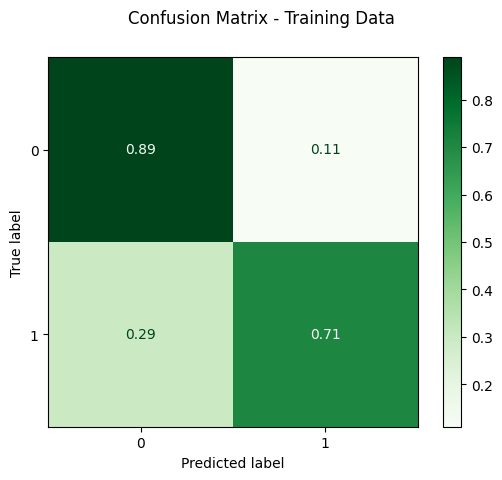

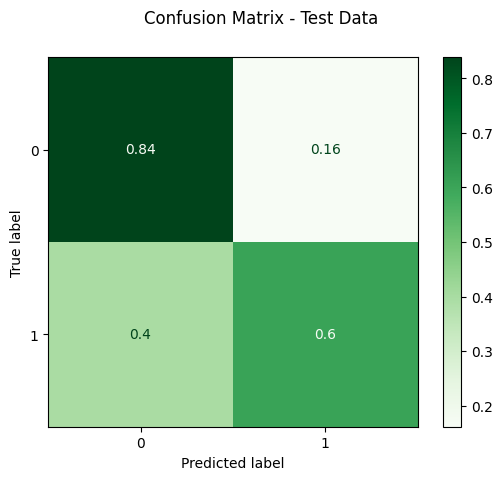

In [ ]:
# Create confusion matrices for training and test data
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions,
               normalize='true',  cmap='Greens')
plt.suptitle('Confusion Matrix - Training Data');

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions,
               normalize='true',  cmap='Greens')
plt.suptitle('Confusion Matrix - Test Data');


### Naive Bayes

In [ ]:
# Instantiate the Naive Bayes model (MultinomialNB in this example)
naive_bayes_model = GaussianNB()

#Create a modeling pipeline that includes data preprocessing and the MultinomialNB
nb_pipeline = make_pipeline(scaler, naive_bayes_model)

# Fit the model to the training data
nb_pipeline.fit(X_train_final, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [ ]:
# Generate predictions for the training dataset using the model
NB_train_predictions = nb_pipeline.predict(X_train_final)

# Generate predictions for the test dataset using the model
NB_test_predictions = nb_pipeline.predict(X_test_final)

In [ ]:
labels = ['Default','No Default']
# Classification report for the training data
print('Classification Report for Training Data')
print(classification_report(y_train, NB_train_predictions, target_names=labels))

# Classification report for the test data
print('Classification Report for Test Data')
print(classification_report(y_test, NB_test_predictions, target_names=labels))


Classification Report for Training Data
              precision    recall  f1-score   support

     Default       0.91      0.37      0.53     66958
  No Default       0.42      0.92      0.58     32907

    accuracy                           0.55     99865
   macro avg       0.66      0.65      0.55     99865
weighted avg       0.75      0.55      0.55     99865

Classification Report for Test Data
              precision    recall  f1-score   support

     Default       0.90      0.37      0.53     22320
  No Default       0.42      0.91      0.57     10969

    accuracy                           0.55     33289
   macro avg       0.66      0.64      0.55     33289
weighted avg       0.74      0.55      0.54     33289



In [ ]:
# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, NB_test_predictions)
print(f"Accuracy of Naive Bayes: {accuracy:.2f}")

Accuracy of Naive Bayes: 0.55


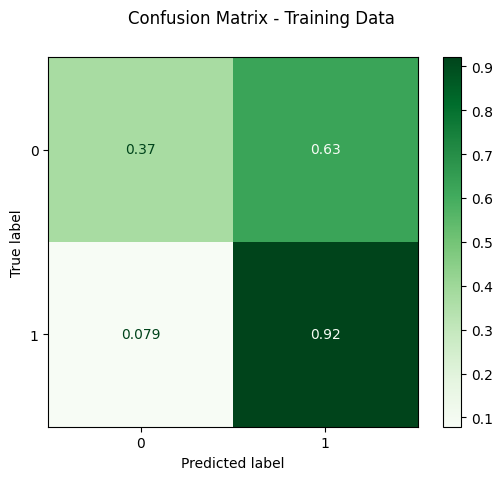

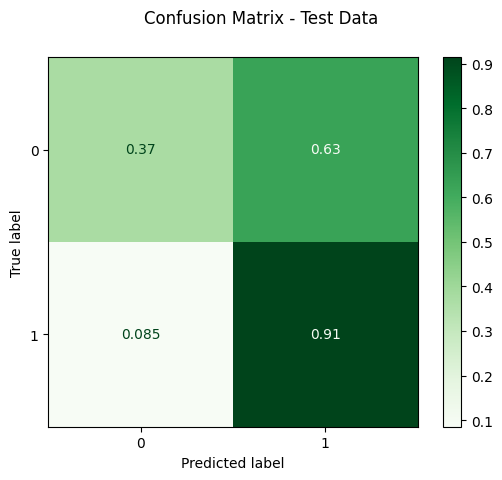

In [ ]:
# Create confusion matrices for training and test data
ConfusionMatrixDisplay.from_predictions(y_train, NB_train_predictions,
               normalize='true',  cmap='Greens')
plt.suptitle('Confusion Matrix - Training Data');

ConfusionMatrixDisplay.from_predictions(y_test, NB_test_predictions,
               normalize='true',  cmap='Greens')
plt.suptitle('Confusion Matrix - Test Data');
